In [11]:
import os
import os.path as op
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mne.io import read_epochs_eeglab
from mne import read_events
import scipy
from functools import partial

import mne
from mne.datasets import sample
from mne.stats import f_mway_rm, f_threshold_mway_rm, fdr_correction, permutation_cluster_test, ttest_ind_no_p, permutation_cluster_1samp_test
from fooof import FOOOF


In [18]:
ages=['9m','12m','adult']
plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})
lfc_color=np.array([55,126,184])/255
lhc_color=np.array([77,175,74])/255
psd_color=np.array([228,26,28])/255

In [13]:
epochs = {
    'exe': ['EBM','LEXT','FTGE','EXGC','EXEND'],
    'obs': ['OBM','LOBS','FTGO','OBGC','OBEND']
}
epoch_labels=['baseline','go-cue','first touch','grasp complete','movement end']
freq_lims=[4,50]

In [14]:
n_subjects={age: 0 for age in ages}

age_psd={}
age_lfc={}
age_lhc={}

for age_idx, age in enumerate(ages):
    out_path = op.join('/home/bonaiuto/lagged_hilbert_coherence/output/dev_beta_umd', age)
    
    all_psd=[]
    all_lfc=[]
    all_lhc=[]
    sub_paths=glob.glob(op.join(out_path,'sub-*'))
    for sub_path in sub_paths:
        subj_id=os.path.split(sub_path)[-1]
        
        epo_psd=[]
        epo_lfc=[]
        epo_lhc=[]
        has_all=True
        for condition in ['exe','obs']:
            for epo in epochs[condition]:
                data_fname = op.join(sub_path, f'{subj_id}-{condition}-{epo}.npz')
                if not op.exists(data_fname):
                    has_all=False
                    break
                else:
                    res=dict(np.load(data_fname))
                    freqs=res['freqs']
                    lags=res['lags']
                    # Average PSD over channels
                    mean_psd=np.mean(res['psd'],axis=0)
                    # Average LC over trials then channels
                    mean_lfc=np.mean(np.mean(res['lfc'],axis=1),axis=0)
                    mean_lhc=np.mean(np.mean(res['lhc'],axis=1),axis=0)
                    f_idx=(freqs>=freq_lims[0]) & (freqs<=freq_lims[1])
                    freqs=freqs[f_idx]
                    mean_psd=mean_psd[f_idx]
                    mean_lfc=mean_lfc[f_idx,:]
                    mean_lhc=mean_lhc[f_idx,:]
                    epo_psd.append(mean_psd)
                    epo_lfc.append(mean_lfc)
                    epo_lhc.append(mean_lhc)
            if not has_all:
                break
        if has_all:
            print(f'{age}: {subj_id}')
            n_subjects[age]=n_subjects[age]+1
            all_psd.append(epo_psd)
            all_lfc.append(epo_lfc)
            all_lhc.append(epo_lhc)
    all_psd = np.array(all_psd)
    all_lfc = np.array(all_lfc)
    all_lhc = np.array(all_lhc)
    
    age_psd[age]=all_psd
    age_lfc[age]=all_lfc
    age_lhc[age]=all_lhc

print(n_subjects)

9m: sub-030
9m: sub-029
9m: sub-023
9m: sub-024
9m: sub-016
9m: sub-044
9m: sub-033
9m: sub-012
9m: sub-018
9m: sub-020
9m: sub-027
9m: sub-043
9m: sub-010
9m: sub-028
9m: sub-031
9m: sub-042
9m: sub-026
9m: sub-019
9m: sub-013
9m: sub-021
9m: sub-032
12m: sub-006
12m: sub-027
12m: sub-012
12m: sub-020
12m: sub-005
12m: sub-024
12m: sub-016
12m: sub-029
12m: sub-008
12m: sub-002
12m: sub-030
12m: sub-032
12m: sub-013
12m: sub-019
12m: sub-021
12m: sub-026
12m: sub-003
12m: sub-009
12m: sub-031
12m: sub-010
12m: sub-028
12m: sub-022
12m: sub-017
12m: sub-004
adult: sub-017
adult: sub-004
adult: sub-009
adult: sub-003
adult: sub-010
adult: sub-022
adult: sub-014
adult: sub-007
adult: sub-019
adult: sub-013
adult: sub-021
adult: sub-011
adult: sub-002
adult: sub-008
adult: sub-005
adult: sub-016
adult: sub-012
adult: sub-018
adult: sub-020
adult: sub-001
adult: sub-006
adult: sub-015
{'9m': 21, '12m': 24, 'adult': 22}


Condition x Epoch
9m
LFaC normalized RMSE=0.2056840795406366
LHaC normalized RMSE=0.10530021296080642
stat_fun(H1): min=0.019200 max=7.711110
Running initial clustering …
Found 27 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

12m
LFaC normalized RMSE=0.29791172259301096
LHaC normalized RMSE=0.09345732762993886
stat_fun(H1): min=0.128809 max=32.051805
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 6: F(1) = 31.96, p = 0.047, frequency range = 15.5-50.0 Hz, lag range = 0.1-1.0 cycles
adult
LFaC normalized RMSE=0.5748692211724674
LHaC normalized RMSE=0.09449462354004981
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 32 clusters


/home/bonaiuto/miniconda3/envs/lhc/lib/python3.10/site-packages/mne/stats/parametric.py:394: RuntimeWarning: invalid value encountered in divide
  fvals = ss / mse


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 0: F(1) = 34.67, p = 0.034, frequency range = 4.0-7.5 Hz, lag range = 0.1-1.6 cycles
Cluster 3: F(1) = 41.33, p = 0.006, frequency range = 9.0-12.5 Hz, lag range = 0.1-4.4 cycles
Cluster 22: F(1) = 21.55, p = 0.003, frequency range = 26.0-50.0 Hz, lag range = 0.1-1.6 cycles
Condition | Epoch
12m
EBM
LEXT
FTGE
stat_fun(H1): min=-6.881439 max=8.572176
Running initial clustering …
Found 13 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 0: T23 = 8.57, p = 0.001, frequency range = 6.5-8.0 Hz, lag range = 0.30-4.40 cycles
Cluster 1: T23 = 4.29, p = 0.020, frequency range = 10.0-10.0 Hz, lag range = 0.10-0.30 cycles
Cluster 3: T23 = 4.77, p = 0.012, frequency range = 12.0-12.5 Hz, lag range = 0.10-0.30 cycles
Cluster 4: T23 = 4.18, p = 0.044, frequency range = 13.0-13.0 Hz, lag range = 0.20-0.30 cycles
Cluster 5: T23 = 5.47, p = 0.015, frequency range = 17.0-17.0 Hz, lag range = 0.10-0.30 cycles
Cluster 6: T23 = 6.82, p = 0.002, frequency range = 18.0-22.5 Hz, lag range = 0.10-0.40 cycles
Cluster 7: T23 = 6.88, p = 0.002, frequency range = 23.5-29.5 Hz, lag range = 0.10-0.50 cycles
Cluster 9: T23 = 6.59, p = 0.002, frequency range = 31.0-35.0 Hz, lag range = 0.10-0.40 cycles
Cluster 10: T23 = 6.22, p = 0.002, frequency range = 35.5-43.0 Hz, lag range = 0.10-0.30 cycles
Cluster 11: T23 = 5.75, p = 0.002, frequency range = 44.0-48.0 Hz, lag range = 0.10-0.20 cycles
Cluster 12: T23 = 6.70, p = 0.009, frequency range

  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 0: T23 = 8.63, p = 0.001, frequency range = 7.0-8.0 Hz, lag range = 0.20-4.10 cycles
Cluster 1: T23 = 4.94, p = 0.016, frequency range = 4.0-4.0 Hz, lag range = 0.20-0.40 cycles
Cluster 2: T23 = 4.26, p = 0.008, frequency range = 4.5-4.5 Hz, lag range = 0.50-0.90 cycles
Cluster 3: T23 = 5.08, p = 0.027, frequency range = 10.0-10.0 Hz, lag range = 0.10-0.20 cycles
Cluster 4: T23 = 4.18, p = 0.021, frequency range = 10.5-11.0 Hz, lag range = 0.20-0.30 cycles
Cluster 5: T23 = 5.09, p = 0.004, frequency range = 12.0-13.5 Hz, lag range = 0.10-0.30 cycles
Cluster 6: T23 = 10.25, p = 0.001, frequency range = 17.0-50.0 Hz, lag range = 0.10-0.80 cycles
EXEND
stat_fun(H1): min=-8.624488 max=7.562578
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 0: T23 = 7.56, p = 0.001, frequency range = 7.0-8.0 Hz, lag range = 0.30-3.80 cycles
Cluster 1: T23 = 4.71, p = 0.043, frequency range = 4.0-4.0 Hz, lag range = 0.30-0.40 cycles
Cluster 2: T23 = 5.49, p = 0.002, frequency range = 9.5-11.5 Hz, lag range = 0.10-0.50 cycles
Cluster 3: T23 = 5.59, p = 0.015, frequency range = 12.5-13.0 Hz, lag range = 0.10-0.40 cycles
Cluster 4: T23 = 8.62, p = 0.001, frequency range = 16.5-50.0 Hz, lag range = 0.10-0.80 cycles
adult
EBM
LEXT
FTGE
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 5 clusters


/home/bonaiuto/miniconda3/envs/lhc/lib/python3.10/site-packages/mne/stats/parametric.py:55: RuntimeWarning: invalid value encountered in divide
  return np.mean(X, axis=0) / np.sqrt(var / X.shape[0])
/tmp/ipykernel_22484/3230353662.py:157: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_1samp_test(


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 0: T21 = 6.83, p = 0.001, frequency range = 10.5-11.5 Hz, lag range = 0.20-1.60 cycles
Cluster 2: T21 = 8.26, p = 0.001, frequency range = 4.0-6.0 Hz, lag range = 0.10-1.20 cycles
Cluster 4: T21 = 4.64, p = 0.042, frequency range = 37.0-38.0 Hz, lag range = 0.20-0.20 cycles
EXGC
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 11 clusters


/tmp/ipykernel_22484/3230353662.py:157: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_1samp_test(


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 0: T21 = 6.39, p = 0.001, frequency range = 10.5-11.5 Hz, lag range = 0.20-1.70 cycles
Cluster 1: T21 = 8.92, p = 0.001, frequency range = 4.0-6.5 Hz, lag range = 0.10-1.30 cycles
Cluster 2: T21 = 4.31, p = 0.018, frequency range = 7.0-7.5 Hz, lag range = 0.30-0.50 cycles
Cluster 3: T21 = 4.25, p = 0.041, frequency range = 14.5-14.5 Hz, lag range = 0.40-0.60 cycles
EXEND
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 19 clusters


/tmp/ipykernel_22484/3230353662.py:157: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_1samp_test(


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 0: T21 = 8.75, p = 0.001, frequency range = 9.5-11.5 Hz, lag range = 0.10-2.40 cycles
Cluster 1: T21 = 4.34, p = 0.049, frequency range = 21.5-21.5 Hz, lag range = 0.20-0.30 cycles
Cluster 2: T21 = 8.60, p = 0.001, frequency range = 4.0-7.0 Hz, lag range = 0.10-1.70 cycles
Cluster 4: T21 = 5.81, p = 0.002, frequency range = 15.0-15.0 Hz, lag range = 0.20-0.90 cycles
Cluster 6: T21 = 4.83, p = 0.012, frequency range = 17.0-17.0 Hz, lag range = 0.30-0.70 cycles
Cluster 8: T21 = 4.32, p = 0.028, frequency range = 31.0-31.5 Hz, lag range = 0.20-0.30 cycles
Cluster 9: T21 = 4.59, p = 0.020, frequency range = 33.5-33.5 Hz, lag range = 0.10-0.30 cycles
Cluster 11: T21 = 5.12, p = 0.014, frequency range = 35.0-35.5 Hz, lag range = 0.10-0.30 cycles
Cluster 13: T21 = 4.43, p = 0.044, frequency range = 37.0-37.0 Hz, lag range = 0.20-0.30 cycles
Cluster 14: T21 = 6.69, p = 0.001, frequency range = 37.5-39.0 Hz, lag range = 0.10-0.50 cycles
Cluster 15: T21 = 7.06, p = 0.001, frequency range

/tmp/ipykernel_22484/3230353662.py:226: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_1samp_test(


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 0: T21 = 8.46, p = 0.001, frequency range = 4.0-6.5 Hz, lag range = 0.10-1.30 cycles
Cluster 5: T21 = 4.19, p = 0.021, frequency range = 30.5-31.0 Hz, lag range = 0.10-0.30 cycles
Cluster 6: T21 = 4.65, p = 0.016, frequency range = 31.5-32.0 Hz, lag range = 0.10-0.50 cycles
Cluster 7: T21 = 7.39, p = 0.001, frequency range = 33.5-50.0 Hz, lag range = 0.10-1.00 cycles
Cluster 9: T21 = 9.40, p = 0.001, frequency range = 9.5-11.5 Hz, lag range = 0.20-2.60 cycles
Cluster 11: T21 = 5.58, p = 0.003, frequency range = 20.5-21.5 Hz, lag range = 0.30-1.10 cycles
EXGC
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 11 clusters


/tmp/ipykernel_22484/3230353662.py:226: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_1samp_test(


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 0: T21 = 8.41, p = 0.001, frequency range = 4.0-6.5 Hz, lag range = 0.10-1.40 cycles
Cluster 1: T21 = 5.42, p = 0.027, frequency range = 5.5-5.5 Hz, lag range = 1.30-1.60 cycles
Cluster 5: T21 = 4.65, p = 0.003, frequency range = 30.0-32.5 Hz, lag range = 0.10-0.40 cycles
Cluster 6: T21 = 7.93, p = 0.001, frequency range = 33.5-50.0 Hz, lag range = 0.10-0.80 cycles
Cluster 9: T21 = 9.61, p = 0.001, frequency range = 9.5-11.5 Hz, lag range = 0.20-2.50 cycles
Cluster 10: T21 = 5.17, p = 0.004, frequency range = 21.0-21.5 Hz, lag range = 0.30-1.10 cycles
EXEND
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 12 clusters


/tmp/ipykernel_22484/3230353662.py:226: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_1samp_test(


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 0: T21 = 7.89, p = 0.001, frequency range = 4.0-7.0 Hz, lag range = 0.10-1.30 cycles
Cluster 5: T21 = 4.76, p = 0.039, frequency range = 29.0-29.0 Hz, lag range = 0.20-0.40 cycles
Cluster 6: T21 = 4.64, p = 0.021, frequency range = 30.5-31.0 Hz, lag range = 0.10-0.30 cycles
Cluster 7: T21 = 8.47, p = 0.001, frequency range = 33.0-50.0 Hz, lag range = 0.10-0.90 cycles
Cluster 10: T21 = 11.55, p = 0.001, frequency range = 9.5-11.5 Hz, lag range = 0.10-2.50 cycles
Cluster 11: T21 = 5.74, p = 0.005, frequency range = 21.0-22.0 Hz, lag range = 0.20-1.10 cycles


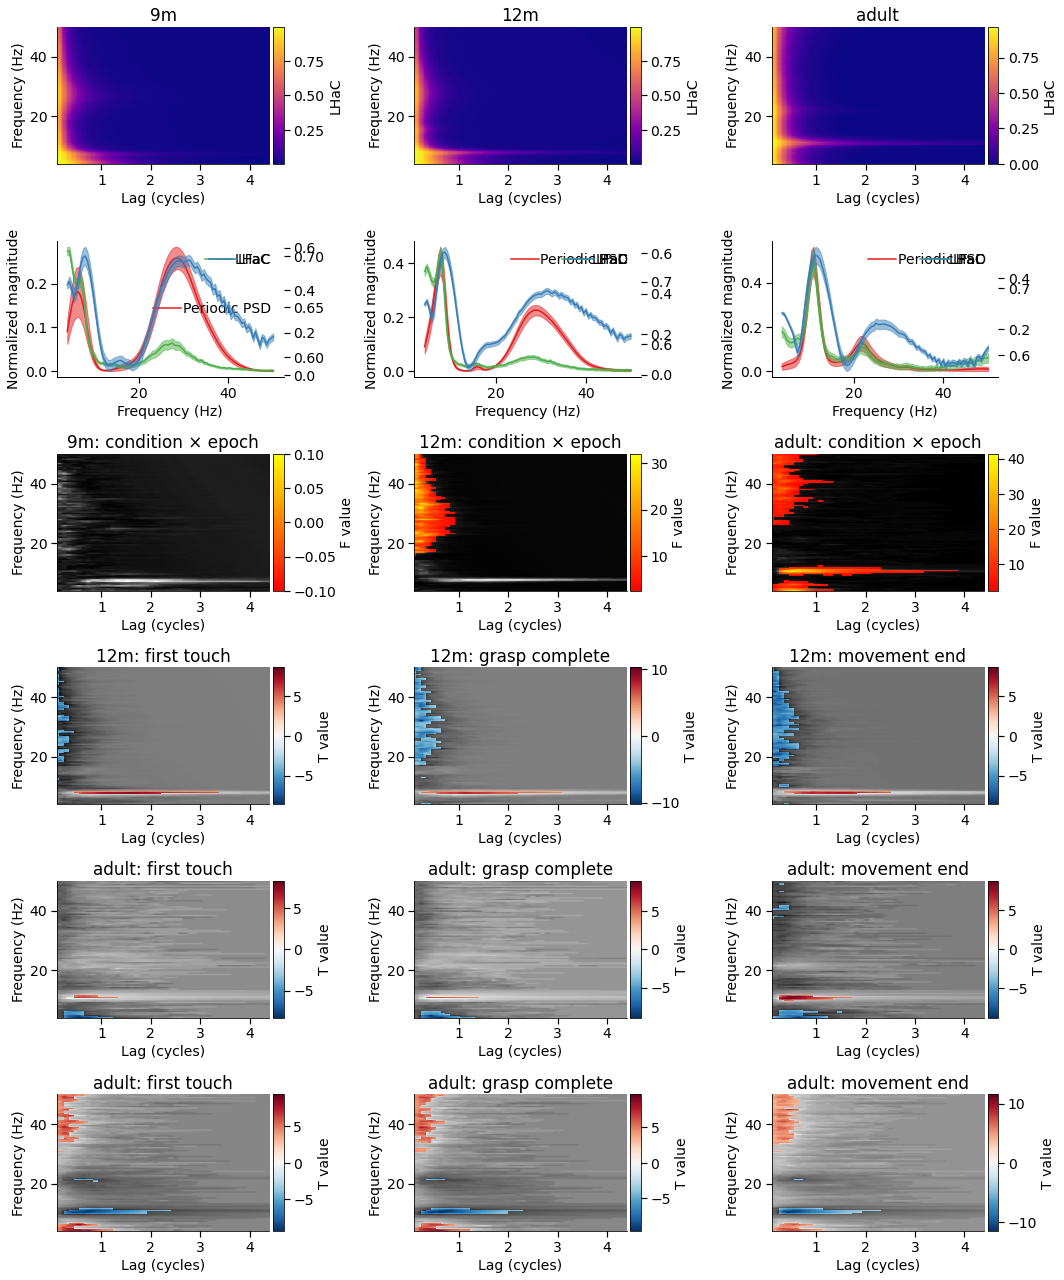

In [32]:
fig = plt.figure(figsize=(15,18))
gs = fig.add_gridspec(6, 3)

def colorbar(mappable, label):
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax, label=label)
    plt.sca(last_axes)
    return cbar

def stat_fun(*args):
    return f_mway_rm(
        np.swapaxes(args, 1, 0),
        factor_levels=factor_levels,
        effects=effects,
        return_pvals=False,
    )[0]

# Define helper to extract periodic component
def extract_periodic(freqs, psd):
    fm = FOOOF(peak_width_limits=[1, 8], max_n_peaks=6, verbose=False)
    fm.fit(freqs, psd)
    return fm.get_params('peak_params'), fm._peak_fit

def min_max(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))


n_conditions = 10
factor_levels = [2, 5]  # number of levels in each factor
effects = "A:B"  # this is the default signature for computing all effects

print('Condition x Epoch')
for age_idx, age in enumerate(ages):
    print(age)
    ax = fig.add_subplot(gs[0,age_idx])
    c = ax.imshow(
          np.mean(np.mean(age_lhc[age],axis=1),axis=0),
          cmap='plasma',
          aspect="auto",
          origin="lower",
          extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
        )
    colorbar(c, 'LHaC')
    ax.set_xlabel("Lag (cycles)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(age)
    
    ax = fig.add_subplot(gs[1,age_idx])
    m_psd=np.mean(age_psd[age],axis=1)
    periodic=[]
    for s_idx in range(m_psd.shape[0]):
        _, p = extract_periodic(freqs, m_psd[s_idx,:])
        periodic.append(p)
    periodic=np.array(periodic)
    m_periodic=np.mean(periodic,axis=0)
    se_periodic=np.std(periodic,axis=0)/np.sqrt(periodic.shape[0])

    l_idx=(lags>=.5) & (lags<=1)
    
    m_lfc=np.mean(np.mean(np.mean(age_lfc[age][:,:,:,l_idx],axis=-1),axis=1),axis=0)
    se_lfc=np.std(np.mean(np.mean(age_lfc[age][:,:,:,l_idx],axis=-1),axis=1),axis=0)/np.sqrt(age_lfc[age].shape[0])
    m_lhc=np.mean(np.mean(np.mean(age_lhc[age][:,:,:,l_idx],axis=-1),axis=1),axis=0)
    se_lhc=np.std(np.mean(np.mean(age_lhc[age][:,:,:,l_idx],axis=-1),axis=1),axis=0)/np.sqrt(age_lhc[age].shape[0])
    
    n_psd_lfc = m_lfc / np.nanmax(m_lfc)
    n_psd_lhc = m_lhc / np.nanmax(m_lhc)

    n_psd = m_periodic / np.max(m_periodic)
    signal_power = np.nansum(n_psd)
    lfc_rmse = np.sqrt(np.nansum((n_psd_lfc - n_psd) ** 2))/signal_power
    lhc_rmse = np.sqrt(np.nansum((n_psd_lhc - n_psd) ** 2))/signal_power
    print(f'LFaC normalized RMSE={lfc_rmse}')
    print(f'LHaC normalized RMSE={lhc_rmse}')
            
    ax.plot(freqs,m_periodic,label='Periodic PSD',color=psd_color)
    ax.fill_between(freqs, m_periodic-se_periodic, m_periodic+se_periodic,alpha=.5,color=psd_color)
    plt.legend()
    ax2=ax.twinx()
    ax2.plot(freqs,m_lhc,color=lhc_color,label='LHaC')
    ax2.fill_between(freqs, m_lhc-se_lhc, m_lhc+se_lhc,alpha=.5,color=lhc_color)
    plt.legend()
    ax3=ax.twinx()
    ax3.plot(freqs,m_lfc,color=lfc_color,label='LFaC')
    ax3.fill_between(freqs, m_lfc-se_lfc, m_lfc+se_lfc,alpha=.5,color=lfc_color)
    plt.legend()
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Normalized magnitude')
    
    ax = fig.add_subplot(gs[2,age_idx])
    n_replications = age_lhc[age].shape[0]    
    data = np.swapaxes(np.asarray(age_lhc[age]), 1, 0)
    f_thresh = f_threshold_mway_rm(n_replications, factor_levels, effects, .05)
    F_obs, clusters, cluster_p_values, h0 = mne.stats.permutation_cluster_test(
        data,
        stat_fun=stat_fun,
        threshold=f_thresh,
        tail=1, # f-test, so tail > 0
        n_jobs=None,
        n_permutations=1000,
        buffer_size=None,
        out_type="mask",
        seed=0,
    )
    good_clusters = np.where(cluster_p_values < 0.05)[0]
    F_obs[np.isnan(F_obs)]=0
    F_obs_plot = np.full_like(F_obs, np.nan)
    for ii in good_clusters:
        mask = clusters[ii]
        F_obs_plot[mask] = F_obs[mask]

        # Extract frequency and lag indices from the mask
        freq_idxs, lag_idxs = np.where(mask)
        freq_range = (freqs[min(freq_idxs)], freqs[max(freq_idxs)])
        lag_range = (lags[min(lag_idxs)], lags[max(lag_idxs)])
        max_F = np.nanmax(F_obs[mask])
        p_val = cluster_p_values[ii]

        print(f"Cluster {ii}: F(1) = {max_F:.2f}, p = {p_val:.3f}, "
              f"frequency range = {freq_range[0]:.1f}-{freq_range[1]:.1f} Hz, "
              f"lag range = {lag_range[0]:.1f}-{lag_range[1]:.1f} cycles")
        
    for f_image, cmap in zip([F_obs, F_obs_plot], ["gray", "autumn"]):
        c = ax.imshow(
          f_image,
          cmap=cmap,
          aspect="auto",
          origin="lower",
          extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
        )
    colorbar(c, 'F value')
    ax.set_xlabel("Lag (cycles)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(f'{age}: condition × epoch')
        

print('Condition | Epoch')
for age_idx, age in enumerate(['12m','adult']):
    print(age)
    for exe_epo_idx, exe_epo in enumerate(epochs['exe']):        
        print(exe_epo)
        if exe_epo_idx>=2:
            obs_epo_idx = len(epochs['exe'])+exe_epo_idx
            obs_epo = epochs['obs'][exe_epo_idx]

            exe_lhc=age_lhc[age][:,exe_epo_idx,:,:]
            obs_lhc=age_lhc[age][:,obs_epo_idx,:,:]

            diff_lhc=obs_lhc-exe_lhc

            dof = diff_lhc.shape[0] - 1
            t_thresh = scipy.stats.t.ppf(1 - 0.001 / 2, df=dof)

            T_obs, clusters, cluster_p_values, H0 = permutation_cluster_1samp_test(
                diff_lhc,
                n_permutations=1000,
                threshold=t_thresh,
                tail=0, # two-tailed
                out_type="mask",
                verbose=True,
            )

            ax = fig.add_subplot(gs[3+age_idx, exe_epo_idx-2])

            good_clusters = np.where(cluster_p_values < 0.05)[0]
            T_obs[np.isnan(T_obs)]=0
            T_obs_plot = np.full_like(T_obs, np.nan)
            for ii in good_clusters:
                cluster_mask = clusters[ii]
                T_obs_plot[cluster_mask] = T_obs[cluster_mask]

                # Get the indices of the cluster
                cluster_inds = np.argwhere(cluster_mask)
                f_inds = cluster_inds[:, 0]
                l_inds = cluster_inds[:, 1]

                # Get frequency and lag range
                f_range = freqs[f_inds.min()], freqs[f_inds.max()]
                l_range = lags[l_inds.min()], lags[l_inds.max()]
                peak_T = np.nanmax(np.abs(T_obs[cluster_mask]))
                p_val = cluster_p_values[ii]

                print(f"Cluster {ii}: T{dof} = {peak_T:.2f}, p = {p_val:.3f}, "
                      f"frequency range = {f_range[0]:.1f}-{f_range[1]:.1f} Hz, "
                      f"lag range = {l_range[0]:.2f}-{l_range[1]:.2f} cycles")

            ax.imshow(
                T_obs,
                extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
                aspect="auto",
                origin="lower",
                cmap="gray",
            )

            max_T = np.nanmax(abs(T_obs_plot))
            i1 =ax.imshow(
                T_obs_plot,
                extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
                aspect="auto",
                origin="lower",
                cmap="RdBu_r",
                vmin=-max_T,
                vmax=max_T,
             )
            colorbar(i1, 'T value')
            ax.set_xlabel("Lag (cycles)")
            ax.set_ylabel("Frequency (Hz)")
            ax.set_title(f'{age}: {epoch_labels[exe_epo_idx]}')
        
age = 'adult'
base_lhc=age_lhc[age][:,0,:,:]

print('Epoch vs Baseline')
for exe_epo_idx, exe_epo in enumerate(epochs['exe'][2:]):
    print(exe_epo)
    epo_lhc=age_lhc[age][:,exe_epo_idx+2,:,:]

    diff_lhc=epo_lhc-base_lhc

    dof = diff_lhc.shape[0] - 1
    t_thresh = scipy.stats.t.ppf(1 - 0.001 / 2, df=dof)

    T_obs, clusters, cluster_p_values, H0 = permutation_cluster_1samp_test(
        diff_lhc,
        n_permutations=1000,
        threshold=t_thresh,
        tail=0, # two-tailed
        out_type="mask",
        verbose=True,
    )

    ax = fig.add_subplot(gs[5, exe_epo_idx])
    
    good_clusters = np.where(cluster_p_values < 0.05)[0]
    T_obs[np.isnan(T_obs)]=0
    T_obs_plot = np.full_like(T_obs, np.nan)
    for ii in good_clusters:
        cluster_mask = clusters[ii]
        T_obs_plot[cluster_mask] = T_obs[cluster_mask]

        # Get the indices of the cluster
        cluster_inds = np.argwhere(cluster_mask)
        f_inds = cluster_inds[:, 0]
        l_inds = cluster_inds[:, 1]

        # Get frequency and lag range
        f_range = freqs[f_inds.min()], freqs[f_inds.max()]
        l_range = lags[l_inds.min()], lags[l_inds.max()]
        peak_T = np.nanmax(np.abs(T_obs[cluster_mask]))
        p_val = cluster_p_values[ii]

        print(f"Cluster {ii}: T{dof} = {peak_T:.2f}, p = {p_val:.3f}, "
              f"frequency range = {f_range[0]:.1f}-{f_range[1]:.1f} Hz, "
              f"lag range = {l_range[0]:.2f}-{l_range[1]:.2f} cycles")

    ax.imshow(
        T_obs,
        extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
        aspect="auto",
        origin="lower",
        cmap="gray",
    )

    max_T = np.nanmax(abs(T_obs_plot))
    i1 =ax.imshow(
        T_obs_plot,
        extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
        aspect="auto",
        origin="lower",
        cmap="RdBu_r",
        vmin=-max_T,
        vmax=max_T,
     )
    colorbar(i1, 'T value')
    ax.set_xlabel("Lag (cycles)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(f'{age}: {epoch_labels[exe_epo_idx+2]}')

plt.tight_layout()

fig.savefig('../output/figures/figure_6.pdf')

Condition x Epoch
9m
stat_fun(H1): min=0.008627 max=6.885682
Running initial clustering …
Found 15 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

12m
stat_fun(H1): min=0.015258 max=41.437050
Running initial clustering …
Found 14 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 3: F(1) = 41.44, p = 0.004, frequency range = 5.0-18.0 Hz, lag range = 0.1-4.4 cycles
Cluster 13: F(1) = 18.89, p = 0.020, frequency range = 21.0-50.0 Hz, lag range = 0.1-1.5 cycles
adult
stat_fun(H1): min=0.005700 max=48.099330
Running initial clustering …
Found 107 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 9: F(1) = 48.10, p = 0.001, frequency range = 6.5-32.5 Hz, lag range = 0.1-4.4 cycles
Cluster 14: F(1) = 28.20, p = 0.036, frequency range = 16.5-22.0 Hz, lag range = 0.1-1.3 cycles
Cluster 55: F(1) = 22.22, p = 0.002, frequency range = 33.5-50.0 Hz, lag range = 0.1-1.5 cycles
Condition x Epoch
12m
EBM
LEXT
FTGE
stat_fun(H1): min=-4.106405 max=7.902393
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 0: T23 = 7.90, p = 0.001, frequency range = 6.5-14.0 Hz, lag range = 0.10-4.10 cycles
Cluster 2: T23 = 4.15, p = 0.022, frequency range = 10.5-12.0 Hz, lag range = 4.30-4.30 cycles
Cluster 3: T23 = 4.71, p = 0.033, frequency range = 11.0-11.5 Hz, lag range = 3.60-3.60 cycles
Cluster 7: T23 = 4.01, p = 0.023, frequency range = 5.5-5.5 Hz, lag range = 0.90-1.20 cycles
Cluster 8: T23 = 4.11, p = 0.014, frequency range = 13.5-14.0 Hz, lag range = 0.60-1.00 cycles
EXGC
stat_fun(H1): min=-6.543115 max=10.208001
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 0: T23 = 10.21, p = 0.001, frequency range = 6.5-15.0 Hz, lag range = 0.10-4.40 cycles
Cluster 3: T23 = 6.54, p = 0.013, frequency range = 5.0-5.5 Hz, lag range = 0.10-1.40 cycles
Cluster 4: T23 = 5.08, p = 0.013, frequency range = 13.0-15.0 Hz, lag range = 0.10-1.10 cycles
Cluster 5: T23 = 6.33, p = 0.001, frequency range = 33.5-50.0 Hz, lag range = 0.10-1.30 cycles
EXEND
stat_fun(H1): min=-5.968234 max=10.035741
Running initial clustering …
Found 10 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 0: T23 = 10.04, p = 0.001, frequency range = 6.5-15.5 Hz, lag range = 0.10-4.40 cycles
Cluster 5: T23 = 4.39, p = 0.018, frequency range = 5.5-5.5 Hz, lag range = 0.10-1.10 cycles
Cluster 6: T23 = 5.97, p = 0.009, frequency range = 13.0-15.0 Hz, lag range = 0.10-1.20 cycles
Cluster 7: T23 = 5.79, p = 0.003, frequency range = 31.0-50.0 Hz, lag range = 0.10-1.40 cycles
adult
EBM
LEXT
FTGE
stat_fun(H1): min=-6.175103 max=9.235990
Running initial clustering …
Found 45 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 1: T21 = 9.24, p = 0.001, frequency range = 7.5-20.5 Hz, lag range = 0.10-4.40 cycles
Cluster 11: T21 = 5.58, p = 0.040, frequency range = 18.0-18.5 Hz, lag range = 4.20-4.40 cycles
Cluster 12: T21 = 5.20, p = 0.003, frequency range = 19.5-27.0 Hz, lag range = 1.20-2.40 cycles
Cluster 29: T21 = 4.13, p = 0.048, frequency range = 24.5-25.0 Hz, lag range = 2.10-2.20 cycles
Cluster 33: T21 = 6.36, p = 0.013, frequency range = 27.5-31.0 Hz, lag range = 0.10-0.50 cycles
Cluster 37: T21 = 6.33, p = 0.047, frequency range = 32.0-32.5 Hz, lag range = 0.10-0.10 cycles
Cluster 43: T21 = 6.09, p = 0.003, frequency range = 17.5-20.5 Hz, lag range = 0.10-1.20 cycles
Cluster 44: T21 = 6.18, p = 0.002, frequency range = 40.5-49.5 Hz, lag range = 0.40-1.40 cycles
EXGC
stat_fun(H1): min=-6.378673 max=8.547804
Running initial clustering …
Found 55 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 5: T21 = 8.55, p = 0.001, frequency range = 8.5-22.0 Hz, lag range = 0.10-4.10 cycles
Cluster 11: T21 = 4.09, p = 0.026, frequency range = 15.0-16.0 Hz, lag range = 4.20-4.30 cycles
Cluster 21: T21 = 6.85, p = 0.001, frequency range = 19.0-31.0 Hz, lag range = 0.10-2.50 cycles
Cluster 37: T21 = 6.41, p = 0.029, frequency range = 25.5-25.5 Hz, lag range = 3.80-4.00 cycles
Cluster 49: T21 = 5.66, p = 0.043, frequency range = 32.0-32.5 Hz, lag range = 0.10-0.10 cycles
Cluster 53: T21 = 6.38, p = 0.003, frequency range = 17.5-20.5 Hz, lag range = 0.10-1.20 cycles
Cluster 54: T21 = 5.56, p = 0.003, frequency range = 39.5-49.5 Hz, lag range = 0.40-1.40 cycles
EXEND
stat_fun(H1): min=-8.035601 max=8.546764
Running initial clustering …
Found 27 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 1: T21 = 8.55, p = 0.001, frequency range = 7.5-30.5 Hz, lag range = 0.10-4.40 cycles
Cluster 9: T21 = 4.28, p = 0.023, frequency range = 18.5-19.5 Hz, lag range = 2.80-2.90 cycles
Cluster 20: T21 = 5.64, p = 0.029, frequency range = 32.0-32.5 Hz, lag range = 0.10-0.10 cycles
Cluster 24: T21 = 4.44, p = 0.012, frequency range = 7.0-7.5 Hz, lag range = 0.10-0.90 cycles
Cluster 25: T21 = 6.14, p = 0.003, frequency range = 16.5-20.0 Hz, lag range = 0.10-1.20 cycles
Cluster 26: T21 = 8.04, p = 0.001, frequency range = 36.5-50.0 Hz, lag range = 0.10-1.50 cycles
Epoch vs Baseline
FTGE
stat_fun(H1): min=-9.229585 max=6.833403
Running initial clustering …
Found 66 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 1: T21 = 6.83, p = 0.002, frequency range = 37.0-50.0 Hz, lag range = 0.10-1.40 cycles
Cluster 5: T21 = 9.23, p = 0.001, frequency range = 8.0-35.0 Hz, lag range = 0.10-3.80 cycles
Cluster 17: T21 = 3.98, p = 0.036, frequency range = 13.5-14.0 Hz, lag range = 3.70-3.80 cycles
Cluster 18: T21 = 4.18, p = 0.034, frequency range = 14.0-14.5 Hz, lag range = 3.60-3.70 cycles
Cluster 37: T21 = 3.92, p = 0.036, frequency range = 26.0-26.5 Hz, lag range = 2.50-2.60 cycles
Cluster 39: T21 = 4.22, p = 0.047, frequency range = 29.0-29.0 Hz, lag range = 2.50-2.60 cycles
Cluster 41: T21 = 5.56, p = 0.037, frequency range = 30.5-30.5 Hz, lag range = 2.40-2.50 cycles
Cluster 44: T21 = 6.28, p = 0.034, frequency range = 32.0-32.5 Hz, lag range = 0.10-0.10 cycles
Cluster 46: T21 = 5.31, p = 0.037, frequency range = 33.0-33.0 Hz, lag range = 2.60-2.70 cycles
Cluster 49: T21 = 4.94, p = 0.029, frequency range = 34.5-35.0 Hz, lag range = 2.20-2.30 cycles
Cluster 51: T21 = 4.95, p = 0.027, frequenc

  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 2: T21 = 6.94, p = 0.001, frequency range = 37.0-50.0 Hz, lag range = 0.10-1.40 cycles
Cluster 5: T21 = 8.76, p = 0.001, frequency range = 8.0-35.0 Hz, lag range = 0.10-3.70 cycles
Cluster 10: T21 = 3.99, p = 0.036, frequency range = 12.0-12.5 Hz, lag range = 3.30-3.50 cycles
Cluster 25: T21 = 4.76, p = 0.030, frequency range = 20.5-21.5 Hz, lag range = 3.20-3.50 cycles
Cluster 32: T21 = 4.69, p = 0.030, frequency range = 23.0-24.0 Hz, lag range = 3.60-3.90 cycles
Cluster 47: T21 = 4.45, p = 0.035, frequency range = 30.0-30.5 Hz, lag range = 2.40-2.60 cycles
Cluster 53: T21 = 6.10, p = 0.041, frequency range = 32.0-32.5 Hz, lag range = 0.10-0.10 cycles
EXEND
stat_fun(H1): min=-8.830070 max=6.756330
Running initial clustering …
Found 66 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster 0: T21 = 4.69, p = 0.008, frequency range = 6.5-7.5 Hz, lag range = 0.10-1.10 cycles
Cluster 1: T21 = 4.43, p = 0.008, frequency range = 17.0-18.0 Hz, lag range = 0.10-1.10 cycles
Cluster 2: T21 = 6.76, p = 0.001, frequency range = 37.0-50.0 Hz, lag range = 0.10-1.40 cycles
Cluster 3: T21 = 8.83, p = 0.001, frequency range = 8.0-33.5 Hz, lag range = 0.10-3.80 cycles
Cluster 20: T21 = 4.57, p = 0.017, frequency range = 17.5-19.5 Hz, lag range = 3.10-3.50 cycles
Cluster 29: T21 = 4.53, p = 0.027, frequency range = 22.0-22.5 Hz, lag range = 2.60-2.80 cycles
Cluster 38: T21 = 6.76, p = 0.011, frequency range = 25.5-30.5 Hz, lag range = 0.10-0.30 cycles
Cluster 53: T21 = 5.77, p = 0.037, frequency range = 32.0-32.5 Hz, lag range = 0.10-0.10 cycles


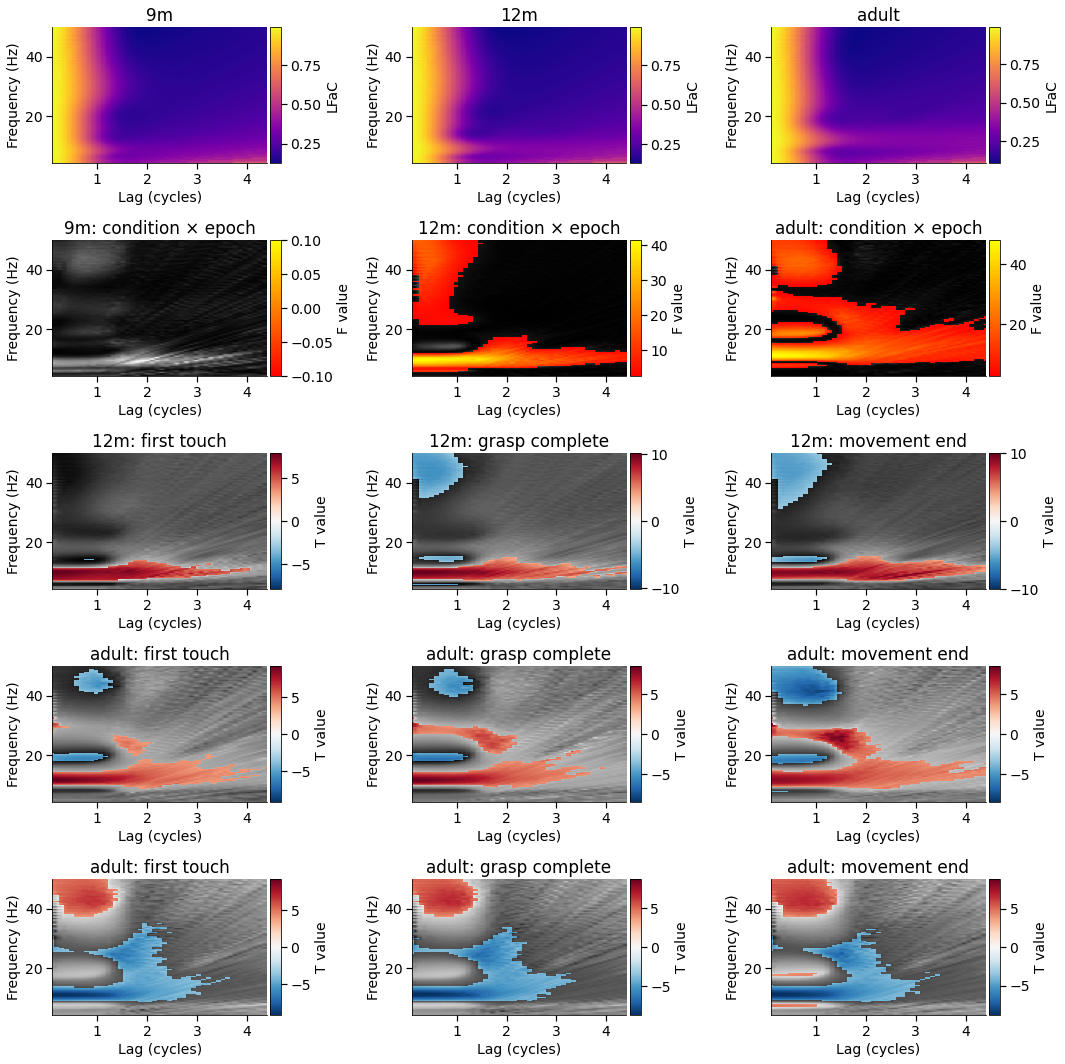

In [33]:
fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(5, 3)


n_conditions = 10
factor_levels = [2, 5]  # number of levels in each factor
effects = "A:B"  # this is the default signature for computing all effects

print('Condition x Epoch')
for age_idx, age in enumerate(ages):
    print(age)
    ax = fig.add_subplot(gs[0,age_idx])
    c = ax.imshow(
          np.mean(np.mean(age_lfc[age],axis=1),axis=0),
          cmap='plasma',
          aspect="auto",
          origin="lower",
          extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
        )
    colorbar(c, 'LFaC')
    ax.set_xlabel("Lag (cycles)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(age)
    
    ax = fig.add_subplot(gs[1,age_idx])
    n_replications = age_lfc[age].shape[0]    
    data = np.swapaxes(np.asarray(age_lfc[age]), 1, 0)
    f_thresh = f_threshold_mway_rm(n_replications, factor_levels, effects, .05)
    F_obs, clusters, cluster_p_values, h0 = mne.stats.permutation_cluster_test(
        data,
        stat_fun=stat_fun,
        threshold=f_thresh,
        tail=1, # f-test, so tail > 0
        n_jobs=None,
        n_permutations=1000,
        buffer_size=None,
        out_type="mask",
        seed=0,
    )
    good_clusters = np.where(cluster_p_values < 0.05)[0]
    F_obs[np.isnan(F_obs)]=0
    F_obs_plot = np.full_like(F_obs, np.nan)
    for ii in good_clusters:
        mask = clusters[ii]
        F_obs_plot[mask] = F_obs[mask]

        # Extract frequency and lag indices from the mask
        freq_idxs, lag_idxs = np.where(mask)
        freq_range = (freqs[min(freq_idxs)], freqs[max(freq_idxs)])
        lag_range = (lags[min(lag_idxs)], lags[max(lag_idxs)])
        max_F = np.nanmax(F_obs[mask])
        p_val = cluster_p_values[ii]

        print(f"Cluster {ii}: F(1) = {max_F:.2f}, p = {p_val:.3f}, "
              f"frequency range = {freq_range[0]:.1f}-{freq_range[1]:.1f} Hz, "
              f"lag range = {lag_range[0]:.1f}-{lag_range[1]:.1f} cycles")
        
    for f_image, cmap in zip([F_obs, F_obs_plot], ["gray", "autumn"]):
        c = ax.imshow(
          f_image,
          cmap=cmap,
          aspect="auto",
          origin="lower",
          extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
        )
    colorbar(c, 'F value')
    ax.set_xlabel("Lag (cycles)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(f'{age}: condition × epoch')
        

print('Condition x Epoch')
for age_idx, age in enumerate(['12m','adult']):
    print(age)
    for exe_epo_idx, exe_epo in enumerate(epochs['exe']):
        print(exe_epo)
        if exe_epo_idx>=2:
            obs_epo_idx = len(epochs['exe'])+exe_epo_idx
            obs_epo = epochs['obs'][exe_epo_idx]

            exe_lfc=age_lfc[age][:,exe_epo_idx,:,:]
            obs_lfc=age_lfc[age][:,obs_epo_idx,:,:]

            diff_lfc=obs_lfc-exe_lfc

            dof = diff_lfc.shape[0] - 1
            t_thresh = scipy.stats.t.ppf(1 - 0.001 / 2, df=dof)

            T_obs, clusters, cluster_p_values, H0 = permutation_cluster_1samp_test(
                diff_lfc,
                n_permutations=1000,
                threshold=t_thresh,
                tail=0, # two-tailed
                out_type="mask",
                verbose=True,
            )

            ax = fig.add_subplot(gs[2+age_idx, exe_epo_idx-2])

            good_clusters = np.where(cluster_p_values < 0.05)[0]
            T_obs[np.isnan(T_obs)]=0
            T_obs_plot = np.full_like(T_obs, np.nan)
            for ii in good_clusters:
                cluster_mask = clusters[ii]
                T_obs_plot[cluster_mask] = T_obs[cluster_mask]

                # Get the indices of the cluster
                cluster_inds = np.argwhere(cluster_mask)
                f_inds = cluster_inds[:, 0]
                l_inds = cluster_inds[:, 1]

                # Get frequency and lag range
                f_range = freqs[f_inds.min()], freqs[f_inds.max()]
                l_range = lags[l_inds.min()], lags[l_inds.max()]
                peak_T = np.nanmax(np.abs(T_obs[cluster_mask]))
                p_val = cluster_p_values[ii]

                print(f"Cluster {ii}: T{dof} = {peak_T:.2f}, p = {p_val:.3f}, "
                      f"frequency range = {f_range[0]:.1f}-{f_range[1]:.1f} Hz, "
                      f"lag range = {l_range[0]:.2f}-{l_range[1]:.2f} cycles")

            ax.imshow(
                T_obs,
                extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
                aspect="auto",
                origin="lower",
                cmap="gray",
            )

            max_T = np.nanmax(abs(T_obs_plot))
            i1 =ax.imshow(
                T_obs_plot,
                extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
                aspect="auto",
                origin="lower",
                cmap="RdBu_r",
                vmin=-max_T,
                vmax=max_T,
             )
            colorbar(i1, 'T value')
            ax.set_xlabel("Lag (cycles)")
            ax.set_ylabel("Frequency (Hz)")
            ax.set_title(f'{age}: {epoch_labels[exe_epo_idx]}')
        
age = 'adult'
base_lfc=age_lfc[age][:,0,:,:]

print('Epoch vs Baseline')
for exe_epo_idx, exe_epo in enumerate(epochs['exe'][2:]):
    print(exe_epo)
    epo_lfc=age_lfc[age][:,exe_epo_idx+2,:,:]

    diff_lfc=epo_lfc-base_lfc

    dof = diff_lfc.shape[0] - 1
    t_thresh = scipy.stats.t.ppf(1 - 0.001 / 2, df=dof)

    T_obs, clusters, cluster_p_values, H0 = permutation_cluster_1samp_test(
        diff_lfc,
        n_permutations=1000,
        threshold=t_thresh,
        tail=0, # two-tailed
        out_type="mask",
        verbose=True,
    )

    ax = fig.add_subplot(gs[4, exe_epo_idx])
    
    good_clusters = np.where(cluster_p_values < 0.05)[0]
    T_obs[np.isnan(T_obs)]=0
    T_obs_plot = np.full_like(T_obs, np.nan)
    for ii in good_clusters:
        cluster_mask = clusters[ii]
        T_obs_plot[cluster_mask] = T_obs[cluster_mask]

        # Get the indices of the cluster
        cluster_inds = np.argwhere(cluster_mask)
        f_inds = cluster_inds[:, 0]
        l_inds = cluster_inds[:, 1]

        # Get frequency and lag range
        f_range = freqs[f_inds.min()], freqs[f_inds.max()]
        l_range = lags[l_inds.min()], lags[l_inds.max()]
        peak_T = np.nanmax(np.abs(T_obs[cluster_mask]))
        p_val = cluster_p_values[ii]

        print(f"Cluster {ii}: T{dof} = {peak_T:.2f}, p = {p_val:.3f}, "
              f"frequency range = {f_range[0]:.1f}-{f_range[1]:.1f} Hz, "
              f"lag range = {l_range[0]:.2f}-{l_range[1]:.2f} cycles")

    ax.imshow(
        T_obs,
        extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
        aspect="auto",
        origin="lower",
        cmap="gray",
    )

    max_T = np.nanmax(abs(T_obs_plot))
    i1 =ax.imshow(
        T_obs_plot,
        extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
        aspect="auto",
        origin="lower",
        cmap="RdBu_r",
        vmin=-max_T,
        vmax=max_T,
     )
    colorbar(i1, 'T value')
    ax.set_xlabel("Lag (cycles)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(f'{age}: {epoch_labels[exe_epo_idx+2]}')

plt.tight_layout()

fig.savefig('../output/figures/figure_7.pdf')